In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Constant acceleration model eqn (1)

In [36]:
p0 = 0                          # rest phase phi 0 in eqn below
t = np.linspace(0,5,1000)         # time sample of 1 second divided into 60 interval
w0 = 5
a = 5                           # acceleration parameter alpha in the eqn below

Equation 1 in K smith(2016). 
$$ \phi(t) = \phi_{0} + \omega_{0}t + \frac{1}{2}\alpha t^2$$

In [37]:
def pulse_phase(p0,t,w0,a):
    '''
    This function calculates and returns pulse phase at any given time 't' when acceleration 'a', intial 
    phase 'p0' and angular frequency 'w0' is known.
    '''
    phase = p0 + w0*t + 0.5*a*t**2
    return phase

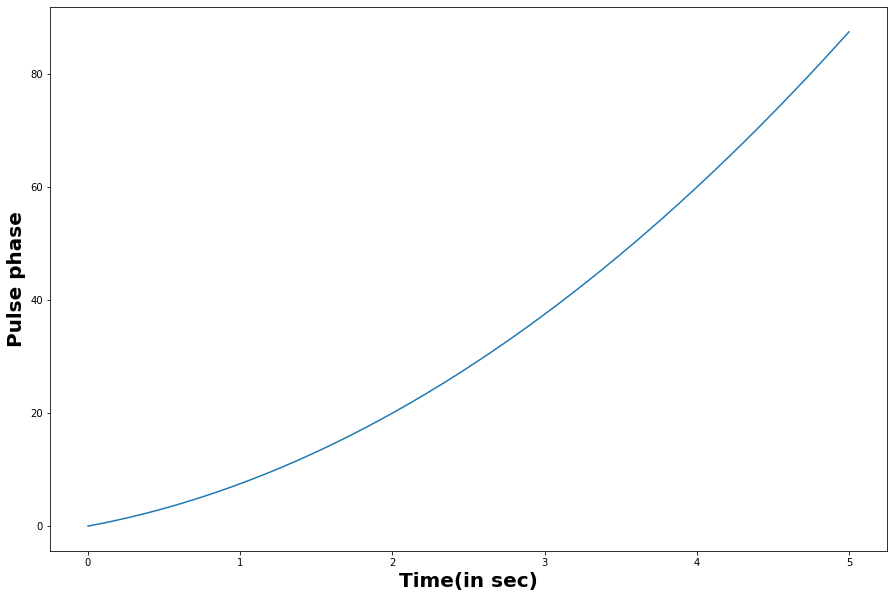

In [38]:
fig, pulse = plt.subplots(figsize = (15,10))
x1 = t
y1 = pulse_phase(p0,t,w0,a)
pulse.plot(x1,y1)
pulse.set_xlabel('Time(in sec)', fontsize = 20, weight = 'bold')
pulse.set_ylabel('Pulse phase', fontsize = 20, weight = 'bold')
plt.show()

### Von-Mises profile eqn (2)

Von Mises profile can be obtained from the euqtion(Eqn 2, K Smith)

$$ \rho(\phi) = e^{-2\kappa(sin^2(\phi/2))}$$

where $$\kappa = \frac{log(2)}{2sin^2{(\pi D/2)}}$$

In [39]:
phase_angle = pulse_phase(p0,t,w0,a)

def von_mises_profile(angle,duty):
    '''
    This function calculates von_mises profile based on duty cycle obtained from previous kappa function.
    For the vlue of pulse_phase it makes a call from pulse_phase function defined above
    '''
    k = (np.log(2))/(2*(np.sin((np.pi*duty)/2))**2)
    
    y = np.exp(-2*k*(np.sin(phase_angle/2))**2)
    
    return y

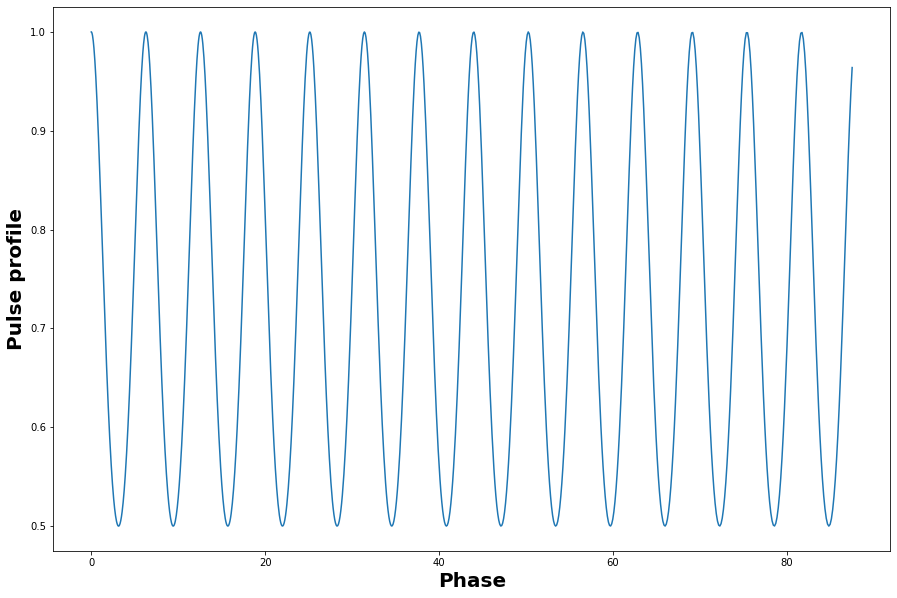

In [40]:
fig, von_mises = plt.subplots(figsize = (15,10))
x2 = phase_angle
y2 = von_mises_profile(x1, 5)
von_mises.plot(x2,y2)
von_mises.set_xlabel('Phase', fontsize = 20, weight = 'bold')
von_mises.set_ylabel('Pulse profile', fontsize = 20, weight = 'bold')
plt.savefig('/home/astroguy/Desktop/research/research_emannuele/init_coh_search_algthm/Pulse_profile.pdf')
plt.show()


### Detection statistic (5)

Intensity time stream $I(t) = \rho(\phi(t))$. So, ignoring the downsampling for now, we just take intensity time stream to be values calculated from von-mises funtion above.

In [ ]:
sample_time = 0.005  # taken to be the time resolution we used 
eta_negativesquared = 1/(sample_time*np.sum((von_mises_profile(x1, 5))**2)) # Used normalization eqn(4)

def detection_statistic(dk, ik):
    '''
    This function calculates the detection statistic (eqn 5, K smith). Function arguments dk and ik are data 
    timestream and intensity timestream that we suuply as lists. Returns detection statistic value as an output.
    '''
    sum_dk_ik =  0
    for i1 in np.range(len(t)):
        val1 = dk[i1]*ik[i1]
        sum_dk_ik +=val1
        
    det_stat = sample_time*eta_negativesquared*sum_dk_ik
return det_stat